# Changelog
1. Removed commented out code (done)
2. Added problem description
3. Added data set limitations description
4. Added extra elaboration chapter 2.1
5. Added fraud detection: transfers with amount of 0 (chapter 3.2) (done)
6. Added fraud detection: recurring tranfer amounts (chapter 3.4)

# SEN163A - Fundamentals of Data Analytics
# Assignment 1 - Data consistency
### Ir. Jacopo De Stefani - [J.deStefani@tudelft.nl](mailto:J.deStefani@tudelft.nl)
### Joao Pizani Flor, M.Sc. - [J.p.pizaniflor@tudelft.nl](mailto:J.p.pizaniflor@tudelft.nl)

## Group 2
- Emmanuel M Boateng - '5617642'
- Joost Oortwijn - '4593472'
- Philip Busscher - '4611993'
- Floris Kool - '4975243'

## Evaluation criteria
The final grade for this assignment will be calculated based on the following criteria:

- $\textbf{Quality of the report}$ - 35\%
    - Reasonable formatting of the document and used citation appropriately
    - Use of proper English (typos, grammar)
    - Code script deliverable
    - Code quality
    - Problem Description
    - Dataset Description
    - Limitations
    - Conclusion/Action recommendations

- $\textbf{Identification of the problems in the database}$ - 65\%


# Introduction - Problem Description

problem description

# 1. Dataset Description

First we will describe the data set. By doing so, we try to identify the inconsistencies in the data set and possible fraudulent activities. We will do so by doing some basic data description prints and plots of the data. 

In [1]:
### Read and load the database

import pandas as pd
import matplotlib as plt
import sqlite3 as sq3
import numpy as np

dbfile = 'transaction_data.db' # path to the file 

conn = sq3.connect(dbfile)  # Create a SQL connection to our SQLite database
curs = conn.cursor()

##Check the tables in the database
table_lst = [a for a in curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()]
print(table_lst) # here is you table list

##get the table info 
for row in curs.execute('PRAGMA table_info(transaction_data)'):    
    print(row)

##read the SQL data and print the first five lines
df = pd.read_sql_query("SELECT * FROM transaction_data", conn) 
##df.head()

##create a list of all columns 
col_names = []
for row in curs.execute('PRAGMA table_info(transaction_data)'):
    names = row[1]
    col_names.append(names)



[('transaction_data',)]
(0, 'id', 'integer', 0, None, 1)
(1, 'timestamp', 'integer', 1, None, 0)
(2, 'type', 'text', 1, None, 0)
(3, 'amount', 'text', 1, None, 0)
(4, 'nameOrig', 'text', 1, None, 0)
(5, 'oldbalanceOrig', 'text', 1, None, 0)
(6, 'newbalanceOrig', 'text', 1, None, 0)
(7, 'nameDest', 'text', 1, None, 0)
(8, 'oldbalanceDest', 'text', 1, None, 0)
(9, 'newbalanceDest', 'text', 1, None, 0)



DataFrame Shape : (7734834, 10)

Number of data points : 7734834

Number of data variables : 10
          amount  timestamp  newbalanceOrig  newbalanceDest
min         0.00          1   -9.244552e+07   -4.234680e+06
max  92445516.64        743    7.742894e+07    3.574408e+08

Mean amount transferred : 147953.14010523

No.of. origin accounts : 6353308

No.of. destination accounts : 2722364


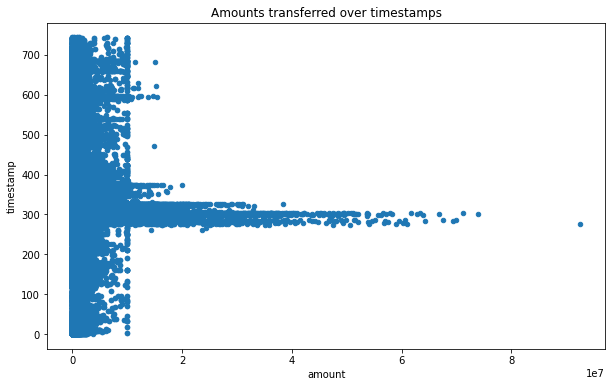

In [2]:
## Get the data description

##convert data types of columns from string to numeric
convert_list =["amount", 
               "oldbalanceOrig", 
               "newbalanceOrig", 
               "oldbalanceDest", 
               "newbalanceDest"]

## convert the str columns of convert_list to numeric
df[convert_list] = df[convert_list].apply(pd.to_numeric)


data_shape = df.shape
print('\nDataFrame Shape :', data_shape)
print('\nNumber of data points :', data_shape[0])
print('\nNumber of data variables :', data_shape[1])


df_MinMax = df[['amount','timestamp', 'newbalanceOrig', 'newbalanceDest']].agg(['min','max'])
print (df_MinMax)

chnk_sz = 7
data_chunks = np.array_split(df, chnk_sz)

df_meanAmount = df['amount'].mean()
print('\nMean amount transferred :', df_meanAmount)

##some info about the dataset (already done with sqlite 
##df.info(verbose=True, buf=None, max_cols=True, memory_usage=None, show_counts=True)

## Plotting some data. Not so informative. TBD: Perhaps filter and plot based on amounts
df.plot(x='amount', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Amounts transferred over timestamps')

orig_n = len(pd.unique(df['nameOrig']))
dest_n = len(pd.unique(df['nameDest']))


print("\nNo.of. origin accounts :", orig_n)
print("\nNo.of. destination accounts :", dest_n)

##df.plot(y=['amount'])

##TBD count timestamp with most # of transactions


### Discussion results data description

Noteable results: 

1. Especially when looking at the graph above, *Amounts transferred over timestamps*, it stands out that around time stamp 300 significantlly higher amounts of money is transferred. Therefore it is interesting to study this inconsitency more indepth in the inconsitency chapter 2 below. 
2. When looking at the maximal and mininimal amount transferred, it is interesting to see that there are amounts transferred with a value of 0.00. Also the max value of 92 milion transferred stands out due to it's size. These two values will be researched more in chapter 3. 
3. When looking at the minimum values of *newbalanceOrig* and *newbalanceDest*, it stands out that there accounts with large negative balances. This could suggest there is fraudulent activity and will be discussed in chapter 3. 

## 1.1 Value counts of origin and destination accounts

In [7]:
df['nameOrig'].value_counts()[:10]

C1286084959    20
C1727860160     4
C1345668381     4
C773245049      4
C220401108      4
C1276100527     4
C1832548028     4
C1760438154     4
C770528136      4
C2006144147     4
Name: nameOrig, dtype: int64

Text(0, 0.5, 'Account name')

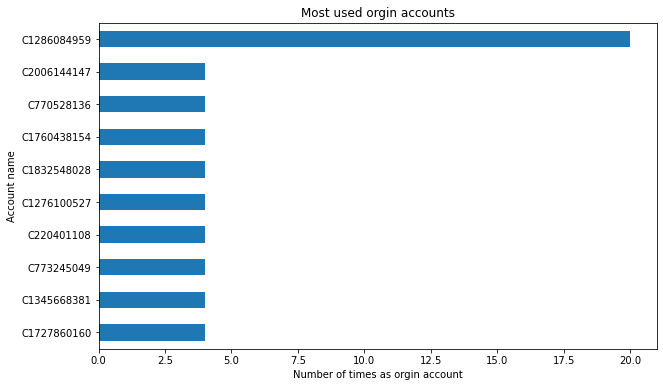

In [8]:
ax = df['nameOrig'].value_counts()[:10].sort_values().plot(kind = 'barh',figsize=(10,6),title='Most used orgin accounts')
ax.set_xlabel("Number of times as orgin account")
ax.set_ylabel("Account name")

In [9]:
df['nameDest'].value_counts()[:10]

C52983754      1372194
C1286084959        113
C985934102         109
C665576141         105
C2083562754        102
C1590550415        101
C248609774         101
C1789550256         99
C451111351          99
C1360767589         98
Name: nameDest, dtype: int64

Text(0, 0.5, 'Account name')

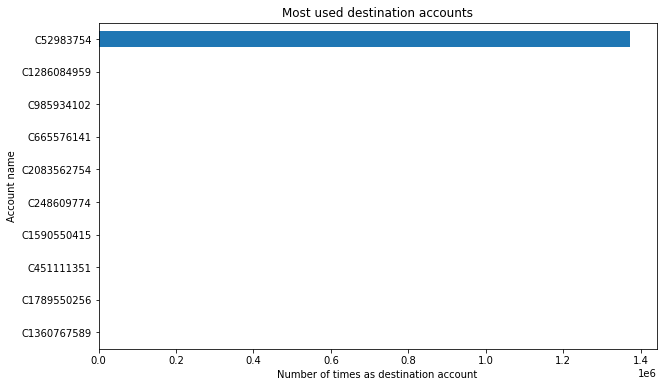

In [10]:
ax = df['nameDest'].value_counts()[:10].sort_values().plot(kind = 'barh',figsize=(10,6),title='Most used destination accounts')
ax.set_xlabel("Number of times as destination account")
ax.set_ylabel("Account name")

### Discussion value counts origin and destination accounts


When looking at the graph above, *most used destination accounts*, it can be seen that almost 1.4 milion transfers (of a total of 7 milion tranfers) is to the same destination account. This could indicate potential fraud and will be looked at more in depth in chapter 3.
Also many transactions are done from C1286084959 which is an outlier compared to how often the other transactions occur. 

# 1.2 Limitations data set

Description of the limitations in the dataset

# 2. Dataset Consistency

## 2.1 Inconsistencies in balances
When looking at the the first rows of the dataframe we found inconsistencies in the balances. Balances were not as expected when looking at the amounts transferred, the new origin balance values and the old balance values of the destination accounts. Therefore these inconsisentcies will be checked for the rest of the data.

In [40]:
# As the dataset contains a lot of data, we will start by only looking at a part of the complete dataset
grouped = df.groupby(df.timestamp)
g = grouped.get_group(19)

In [41]:
# Create new coluns with the expected new balances based on the ammounts transferred
pd.set_option('mode.chained_assignment', None)
g['New_balance_checkOrig'] = g['oldbalanceOrig']-g['amount']
g['New_balance_checkDest'] = g['oldbalanceDest']+g['amount']
g = g.reset_index()

,index,id,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,New_balance_checkOrig,New_balance_checkDest
0,535906,535907,19,TRANSFER,98858.40,C1958895751,646.00,-98212.400,C1074822163,1149634.425,1248492.825,-98212.40,1248492.825
1,535907,535908,19,TRANSFER,221309.75,C1923061167,100398.00,-120911.750,C26253754,595951.055,817260.805,-120911.75,817260.805
2,535908,535909,19,TRANSFER,1154.55,C1223072336,321707.75,320553.200,M1972185551,0.000,1154.550,320553.20,1154.550
3,535909,535910,19,TRANSFER,49210.97,C304920993,302402.00,253191.030,C986267724,80967.000,130177.970,253191.03,130177.970
4,535910,535911,19,TRANSFER,229374.31,C470836390,146129.00,-83245.310,C231037736,3426242.645,3655616.955,-83245.31,3655616.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62546,598452,598453,19,TRANSFER,152929.53,C2143849139,4834599.49,4681669.955,C1599238057,359156.985,512086.510,4681669.96,512086.515
62547,598453,598454,19,TRANSFER,140278.15,C593351836,4987529.02,4847250.870,C1255404581,1348292.605,1488570.755,4847250.87,1488570.755
62548,598454,598455,19,TRANSFER,366027.57,C212001870,30930.00,-335097.570,C1226766963,394336.290,760363.860,-335097.57,760363.860
62549,598455,598456,19,TRANSFER,10962.09,C1334924129,337170.09,326208.000,M1958200626,0.000,10962.090,326208.00,10962.090


In [42]:
#g_test = g['newbalanceOrig','newbalanceDest','New_balance_checkOrig','New_balance_checkDest']
pd.set_option('mode.chained_assignment', None)

for i in range(len(g)):
    if g.loc[i,'newbalanceOrig'] != g.loc[i,'New_balance_checkOrig']:
        newOrig = g.loc[i,'newbalanceOrig']
        checkOrig =  g.loc[i,'New_balance_checkOrig']
        differenceOrig = abs(checkOrig-newOrig)
        if differenceOrig > 0.001:
            g['difference orig'] = differenceOrig
            #print('Difference found in origin balance -> row : ', i, ' ,difference : ', differenceOrig)
    
    if g.loc[i,'newbalanceDest'] != g.loc[i,'New_balance_checkDest']:
        newDest =g.loc[i,'newbalanceDest']
        checkDest=g.loc[i,'New_balance_checkDest']
        differenceDest =  abs(newDest-checkDest)
        if differenceDest > 0.001:
            g['difference dest'] = differenceDest
          #  print('Difference found in destination balance -> row : ', i, ' ,difference : ', differenceDest)

In [43]:
# check if there differences above 0.01
(g['difference orig'] > 0.01).any()

False

In [44]:
# Number of differences in expected origin balances and actual origin balances
(g['difference orig'] > 0).value_counts()

True    62551
Name: difference orig, dtype: int64

In [45]:
# check if there differences above 0.01
(g['difference dest'] > 0.01).any()

False

In [46]:
# Number of differences in expected destination balances and destinationbalances
(g['difference dest'] > 0).value_counts()

True    62551
Name: difference dest, dtype: int64

In [71]:
# check for the whole data set
dest_check = (df['newbalanceDest'] - df['oldbalanceDest']) - df['amount']
orig_check = (df['oldbalanceOrig'] - df['newbalanceOrig']) - df['amount']

In [84]:
decimal_bins = [-1,0.0,0.0005,0.001, 0.005, 0.01,1]

In [85]:
dest_check.groupby(pd.cut(dest_check,decimal_bins)).count()

(-1.0, 0.0]        6066311
(0.0, 0.0005]      1668523
(0.0005, 0.001]          0
(0.001, 0.005]           0
(0.005, 0.01]            0
(0.01, 1.0]              0
dtype: int64

In [86]:
orig_check.groupby(pd.cut(orig_check,decimal_bins)).count()

(-1.0, 0.0]        4598752
(0.0, 0.0005]      1136096
(0.0005, 0.001]          0
(0.001, 0.005]      695387
(0.005, 0.01]      1304599
(0.01, 1.0]              0
dtype: int64

### Discussion value counts origin and destination accounts

It stands out that there are a lot of differences in expected balances and actual balance. But, the differences are always below 0.01. Also when analyzing the whole dataset we find a lot of differences in expected balances and actual balance. For approximately 1.7 million transfers there is difference in expected origin balance and actual orgin balance and for approximately 3.1 million transfers there is difference in expected destination balance and actual destination balance.


Due to the number of found inconsistencies and the low amount of differences we do not expect this to be fraudulent but a small error (possibly a round-off) in the data set. 

# 3. Fraud Identification

## 3.1 Analyzing transfers to C52983754 (highest value count of 1.4 million times)

In [16]:
# creating a df with only the transfers to C52983754
df_C52983754 = df[(df['nameDest'] == 'C52983754')]

In [17]:
print('the max amount transferred to C52983754 is : ' , df_C52983754["amount"].max())
print('the min amount transferred to C52983754 is : ' , df_C52983754["amount"].min())
print('the mean amount transferred to C52983754 is : ' , df_C52983754["amount"].mean())
print('the sum of money (total) transferred to C52983754 is : ' , df_C52983754["amount"].sum())

the max amount transferred to C52983754 is :  0.01
the min amount transferred to C52983754 is :  0.01
the mean amount transferred to C52983754 is :  0.010000000000184448
the sum of money (total) transferred to C52983754 is :  13721.94000000001


### Discussion of results

We have found that there were only transfers of 0.01 euro to the C52983754. In total, due to the high volume of transfers, this accounts for an ammount of around 14k. Because of the high volume of transfers and high total sum of transferred money, we percieve this account, C52983754, as fraudulent. 

## 3.2 Maximal and minimal values transferred

### Transfers with an amount of 0

In [28]:
# New dataframe with transfers of 0 and count number transfers
df_minamount = df[(df['amount'] == 0)]
print('Number of transfers with an amout of 0 : ',len(df_minamount))

Number of transfers with an amout of 0 :  16


In [30]:
df_minamount

,id,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
3326129,3326130,212,TRANSFER,0.0,C1510987794,0.0,-0.005,C1696624817,0.000000e+00,-5.000000e-03
3946645,3946646,250,TRANSFER,0.0,C521393327,0.0,0.000,C480398193,0.000000e+00,0.000000e+00
4570231,4570232,279,TRANSFER,0.0,C539112012,0.0,0.000,C1106468520,1.092811e+06,1.092811e+06
6763288,6763289,387,TRANSFER,0.0,C1294472700,0.0,0.000,C1325541393,1.467587e+07,1.467587e+07
7289367,7289368,425,TRANSFER,0.0,C832555372,0.0,0.000,C1462759334,7.675990e+04,7.675990e+04
7289369,7289370,425,TRANSFER,0.0,C69493310,0.0,0.000,C719711728,4.068892e+06,4.068892e+06
7498604,7498605,554,TRANSFER,0.0,C10965156,0.0,0.000,C1493336195,6.945078e+05,6.945078e+05
7543410,7543411,586,TRANSFER,0.0,C1303719003,0.0,0.000,C900608348,2.146989e+06,2.146989e+06
7617487,7617488,617,TRANSFER,0.0,C1971175979,0.0,0.000,C1352345416,0.000000e+00,0.000000e+00
7635818,7635819,646,TRANSFER,0.0,C2060908932,0.0,0.000,C1587892888,3.552767e+05,3.552767e+05


#### Discussion of results
All the above found transactions are suspicious and indicate potential fraud as transactions of no amount is financially not possible. But out of these transactions, the following ID's are extra interesting: 3326130, 7653545, 7734637, 7734640 as an amount of 0 is transferred but the balances of either the origin account or destination account have changed. These are clear clues indicating fraudulent activity. 

## Transfers with an amount higher than 20 million

In [19]:
# New df with only transfers of 20 milion or higher
df_maxamount = df[(df['amount'] > 20000000)]
print('Number of transfers with an amount of 20 milion or higher : ',len(df_maxamount))

Number of transfers with an amount of 20 milion or higher :  828


In [20]:
(df_maxamount['newbalanceOrig'] < 0).value_counts()

True    828
Name: newbalanceOrig, dtype: int64

Text(0, 0.5, 'Time stamp')

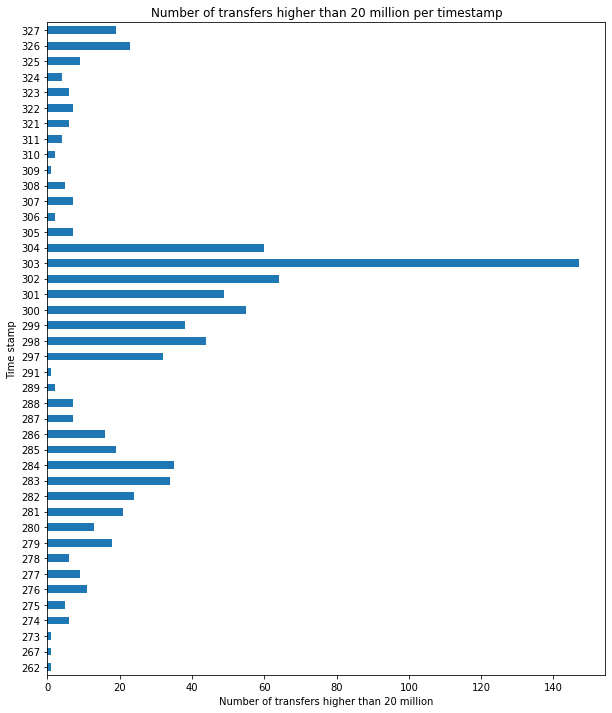

In [21]:
ax = df_maxamount['timestamp'].value_counts().sort_index().plot(kind = 'barh',figsize=(10,12),title='Number of transfers higher than 20 million per timestamp')
ax.set_xlabel("Number of transfers higher than 20 million")
ax.set_ylabel("Time stamp")

All the transfers of amounts higher than 20 million results in negative balances for the orgin account. These negative balances will be researched below in chapter 3.3. Also, all these transfers happen arround the same time stamp (between 262 and 327). 

## 3.3 Negative balances

In [22]:
df_negativebalance = df[(df['newbalanceOrig'] < 0)]
print('Number of negative orgin account balances after transfer: ', len(df_negativebalance))

Number of negative orgin account balances after transfer:  4536677


<AxesSubplot:title={'center':'Negative orgin account balances after transfer over timestamps'}, xlabel='newbalanceOrig', ylabel='timestamp'>

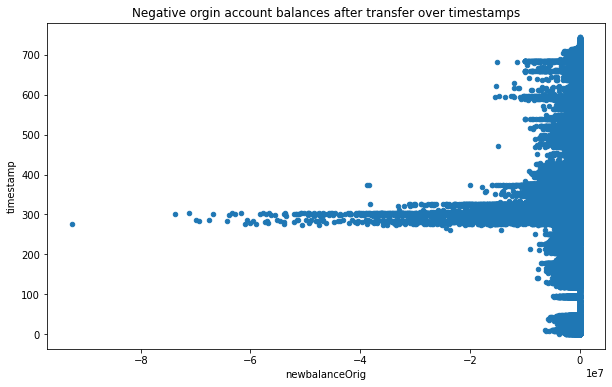

In [23]:
df_negativebalance.plot(x='newbalanceOrig', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Negative orgin account balances after transfer over timestamps')

In [24]:
df_negativebalance2 = df[(df['oldbalanceDest'] < 0)]
print('Number of negative destination account balances before transfer: ', len(df_negativebalance2))

Number of negative destination account balances before transfer:  927


<AxesSubplot:title={'center':'Negative destination account balances after transfer over timestamps'}, xlabel='oldbalanceDest', ylabel='timestamp'>

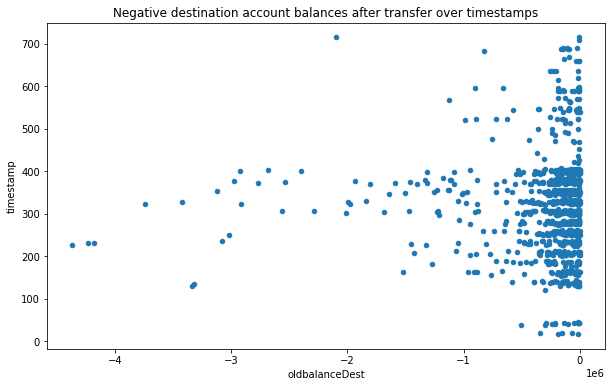

In [25]:
df_negativebalance2.plot(x='oldbalanceDest', y='timestamp', kind='scatter',
        figsize=(10,6),
        title='Negative destination account balances after transfer over timestamps')

### Discussion of results (negative balances)

newbalanceorig:
Remarkable about the dataset is that aproximately half of the newbalanceOrig accounts end up having a negative balance. Moreover, the largest negative accounts occur to be around the 300th timestamp as the plot above displays. Earlier in this research an observation was made that the largest transfers were also done at the 300 timestamp. This can be considered as suspicious and a potential correlation between these two observations must be further investigated. 




## 3.4 recurring transfer amounts

In [34]:
df['amount'].value_counts()[:10]

0.01           1372195
10000000.00       3207
10000.00            88
5000.00             79
15000.00            68
                ...   
20934.75             1
56725.80             1
281534.19            1
1252821.93           1
10.00                1
Name: amount, Length: 4034035, dtype: int64

# Conclusion

After analyzing the the dataset the tests display a few remarkable observations. All the transactions containing a volume of more than 20 million are executed around timestamp 300 as can be observed in the graph in chapter 3.2 and it are these exact transactions that leave the original accounts in a negative state. It is not common that an individual transfers more than 100% of it's money at once. Since this behaviour also only occurs in the range of timestamps around timestamp 300 one can consider this as fraudulent activities. 
Although many transfers happen in this range, no specific bankaccounts have been identified yet that have a suspicious relation with respect to these transactions. This should be further investigated.  

In chapter 1.1 an observation was done to observe what the most 'populair' destination account was. It appeared that C52983754 is the most common destination for transfers in the dataset with 1.4 million transactions. By further analyzing C52983754, it appeared that the amounts that were transferred had a value of 0,01. This can be considered as fraud, since the total amount of the transactions sum up to aprox 14k. But this account could also be in posession of an online payment service where you transfer 0,01 to verify your bank account. 

Another suspicious outlier of transfers come from C1286084959. According to the graph in chapter 1.1 20 transactions come from this account. Since no other original account does that many transactions, one could consider this bankaccount as a victim of fraud. 


## ADD TO CONCLUSION:
- Transfers with an amount of 0 (see 3.2)

In [7]:
### Your code goes here

##splitting data based on timestamps
#grouped = df.groupby(df.timestamp)

##get a specific timestamp group 
#timestamp = 15
#ts_1 = grouped.get_group(timestamp)
#ts_1.head()

######
#splitting data into chunks (for future assignments)
#import numpy as np
#chnk_sz = 3
#np.array_split(df, chnk_sz)
######

##Check for duplicates in each time stamp
#ts_idx = [] 
#for ts in range(1,len(grouped)):
#    g = grouped.get_group(ts)
#    g_len = len(g)
#    unq_rows = g.drop_duplicates()
#    new_g_len = len(unq_rows)
#    if new_g_len != g_len:
#        ts_idx.append(ts)
#        print("g_len: ", g_len, "unique rows: ", new_g_len)

#if len(ts_idx) > 0:
#    print("Duplicates exist in timestamps", *ts_idx)
#else:
#    print("Data is without duplicates", *ts_idx)


# create a function out of this later
#for items in range(len(grouped.get_group(2))):
#    group_obj = grouped.get_group(2)
#    if group_obj.iloc[items,3] == group_obj.iloc[items,6] :
#        print("id",group_obj.iloc[items,3] "same orig: ",group_obj.iloc[items,3], "and dest: ",group_obj.iloc[items,6])


Data is without duplicates


In [15]:
### Your code goes here

##create functions to loop through groups
##Consider tweaking the absolute tolerance(atol) argument 
#def inconsitentNewBalance(group_obj):
#    for index, row in group_obj.iterrows():
#        if np.isclose(row['sumDest'], row['newbalanceDest'], atol=1e-02):
#            row['FraudType'] = "Legitimate"  ## Modify from this line here to create some statistics
#        else:
#            row['FraudType'] = "invalidDestBalance"
#            
#
#def inconsitentOldBalance(group_obj):
#    for index, row in group_obj.iterrows():
#        if np.isclose(row['diffOrig'], row['oldbalanceOrig'], atol=1e-02):
#            row['FraudType'] = "Legitimate" ## Modify from this line here to add some statistics
#        else:
#            row['FraudType'] = "invalidOrigBalance"
            
## small amount transfers between same accounts. 
#def laundering(group_obj):
#    for index, row in group_obj.iterrows(): 
#....

#sum up the columns 
#df['sumDest'] = df.loc[: , ['amount', 'oldbalanceDest']].sum(axis=1)
#df['diffOrig'] = df['oldbalanceOrig'] - df['amount']
#df.head()

#grouped = df.groupby(df.timestamp)


##test fraudulent activity balance inconsitency
#g = grouped.get_group(301)
#for index, row in g.iterrows():
#    if np.isclose(row['sumDest'], row['newbalanceDest'], atol=1e-02):
#        row['FraudType'] = "Legitimate"  ## change from this line here to create some statistics
#    else:
#        row['FraudType'] = "invalidDestBalance"
#        print(row)

##Loop through grouped data 
#for datapoints in grouped:
#    inconsitentOldBalance(datapoints)
#    inconsitentNewBalance(datapoints)

##group data by transfer amount (possibly add timestamp grouping as well)
#transferSum = df.groupby(df.amount)
#transferSum.groups
#for index, row in transferSum.iterrows():
#    ids = row["amount"]
#    print(ids)
    #row[ids.astype(int).isin(ids[ids.duplicated()])].sort("amount")

{0.0: [3326129, 3946645, 4570231, 6763288, 7289367, 7289369, 7498604, 7543410, 7617487, 7635818, 7635820, 7653544, 7720953, 7734636, 7734639, 7734790], 0.01: [0, 6, 13, 16, 20, 23, 26, 29, 32, 35, 38, 45, 50, 55, 60, 67, 72, 76, 81, 83, 85, 96, 98, 103, 105, 108, 110, 114, 118, 127, 133, 142, 154, 157, 171, 173, 175, 178, 180, 182, 184, 194, 197, 202, 204, 208, 211, 216, 223, 251, 259, 263, 266, 276, 284, 288, 296, 302, 308, 311, 315, 324, 329, 331, 333, 338, 344, 358, 366, 368, 374, 385, 389, 393, 401, 417, 425, 444, 449, 461, 471, 477, 489, 493, 497, 499, 505, 512, 520, 523, 530, 534, 540, 543, 546, 552, 564, 573, 576, 578, ...], 0.02: [2867870, 3680246, 4955637], 0.03: [3402823, 7296969], 0.04: [6290827], 0.06: [2034620], 0.07: [2868506], 0.09: [6428077], 0.1: [434263], 0.11: [4374024, 4989957], 0.14: [998175, 3874782], 0.15: [4140719], 0.16: [5621482], 0.17: [4916675], 0.18: [5757585, 5831563], 0.19: [3414049], 0.2: [1066353], 0.21: [1677133], 0.22: [3578964], 0.23: [2360778, 36436